# Sugar market notebook

This notebook serves as an initial exploration into the market, in aide of demostration and development of my data analysis and visualisation skills within Python.  

## Research

The commodity market is seperated into sub groups Agriculture and Metals, sometimes called soft and hard, and Energy. Commodities can be traded at current/spot price or future prices. Future contracts are exchanged between parties who agree a price, quantity and delivery date of the underlying asset.

Sugar is a agricultural/soft commodity with contracts traded in 2 forms, physical white sugar or raw cane sugar. Physical white sugar is No. 5, World market raw cane is No. 11, and US raw cane is No. 16 (formally No. 14 pre-September 2009). 

A single contract prices the 'free-on-board' delivery of 112,000 pounds (equivalent of 50 imperial/long tons) onto the receiver's vessel to a port within the country of origin of the sugar. 

## Data description

This project will analyse Sugar No. 11, focusing on futures contracts of expiry October 2020. No. 11 is used as it denotes the world benchmark contract for raw sugar trading. Data from June 2020 only, the precise period is 01/06/20-29/06/20. Data will be collected from Yahoo Finance via pandas-datareader. Prices are expressed per metric tonne in USD, and Volume in number of contracts exchanged.


## Importing required Modules

In [28]:
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

## Data collection

In [29]:
# start = dt.datetime(2020,6,1)
# end = dt.datetime(2020,6,30)
# df = web.DataReader('SB=F', 'yahoo', start, end)
# df.to_csv('sugar_futures.csv')
df = pd.read_csv(('sugar_futures.csv'),index_col='Date')

## Exploration

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 01/06/2020 to 29/06/2020
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       21 non-null     float64
 1   Low        21 non-null     float64
 2   Open       21 non-null     float64
 3   Close      21 non-null     float64
 4   Volume     21 non-null     int64  
 5   Adj Close  21 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.1+ KB


In [31]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
01/06/2020,11.19,10.83,10.97,10.95,10358485,10.95
02/06/2020,11.36,11.01,11.10,11.27,7822226,11.27
03/06/2020,11.71,11.22,11.37,11.60,11385915,11.60
04/06/2020,11.82,11.44,11.69,11.80,10210779,11.80
05/06/2020,12.12,11.73,11.85,12.05,14006160,12.05
08/06/2020,12.29,11.89,12.16,11.89,17780846,11.89
09/06/2020,12.19,11.80,12.02,12.02,21821481,12.02
10/06/2020,12.40,11.94,12.15,12.40,18642323,12.40
11/06/2020,12.34,11.88,12.33,12.11,15663291,12.11


In [32]:
df['DiffOpenClose']=abs(df['Open']-df['Close']) 
df['DiffHighLow']=abs(df['High']-df['Low']) 

In [33]:
df

,High,Low,Open,Close,Volume,Adj Close,DiffOpenClose,DiffHighLow
Date,,,,,,,,
01/06/2020,11.19,10.83,10.97,10.95,10358485,10.95,0.020000,0.360000
02/06/2020,11.36,11.01,11.10,11.27,7822226,11.27,0.170000,0.349999
03/06/2020,11.71,11.22,11.37,11.60,11385915,11.60,0.230000,0.490000
04/06/2020,11.82,11.44,11.69,11.80,10210779,11.80,0.110001,0.380000
05/06/2020,12.12,11.73,11.85,12.05,14006160,12.05,0.200000,0.390000
08/06/2020,12.29,11.89,12.16,11.89,17780846,11.89,0.270000,0.400000
09/06/2020,12.19,11.80,12.02,12.02,21821481,12.02,0.000000,0.389999
10/06/2020,12.40,11.94,12.15,12.40,18642323,12.40,0.250000,0.460000
11/06/2020,12.34,11.88,12.33,12.11,15663291,12.11,0.220000,0.460000


** Maximum and minimum Open values **

In [34]:
round((df['Open'].max()),2)

12.33

In [35]:
round((df['Open'].min()),2)

10.97

** Maximum and minimum Open values **

In [36]:
round((df['Close'].max()),2)

12.4

In [37]:
round((df['Close'].min()),2)

10.95

** Maximum and minimum volume values **

In [38]:
df['Volume'].max()

21821481

In [39]:
df['Volume'].min()

7728680

** Maximum and minimum Open and Close difference values **

In [40]:
round((df['DiffOpenClose'].max()),2)

0.39

In [41]:
round((df['DiffOpenClose'].min()),2)

0.0

** Maximum and minimum High and Low difference values **

In [42]:
round((df['DiffHighLow'].max()),2)

0.64

In [43]:
round((df['DiffHighLow'].min()),2)

0.28

## Analysis

Text(0.5, 1.0, 'Figure 1')

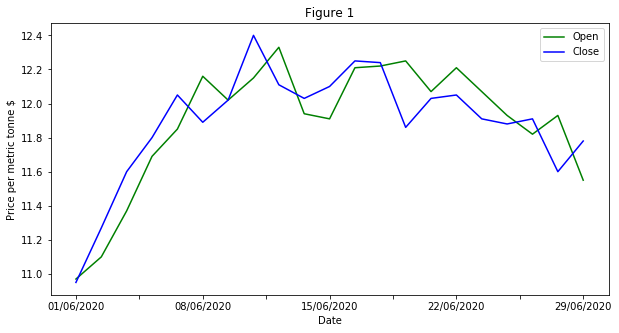

In [44]:
fig_OC_L = plt.figure(figsize=(10,5))
df['Open'].plot(color='green')
df['Close'].plot(color='blue')
plt.xlabel('Date')
plt.ylabel('Price per metric tonne $')
plt.legend()
plt.title('Figure 1')

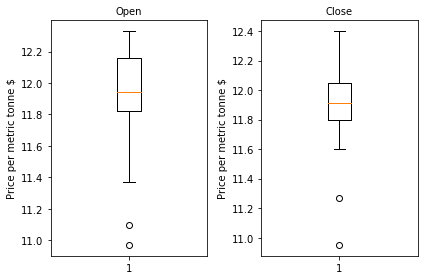

In [45]:
fig_OC_B , ax = plt.subplots(nrows=1, ncols=2)

ax[0].boxplot(df['Open'])
ax[0].set_title('Open', fontsize=10)

ax[1].boxplot(df['Close'])
ax[1].set_title('Close', fontsize=10)

for axs in ax.flat:
    axs.set(ylabel='Price per metric tonne $' )

plt.tight_layout()


Text(0.5, 1.0, 'Figure 2')

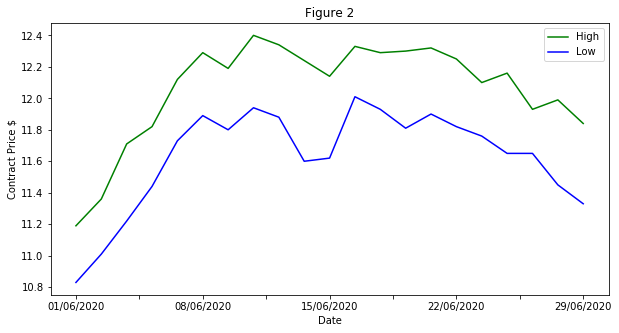

In [46]:
fig_HL_L = plt.figure(figsize=(10,5))
df['High'].plot(color='green')
df['Low'].plot(color='blue')
plt.xlabel('Date')
plt.ylabel('Contract Price $')
plt.legend()
plt.title('Figure 2')

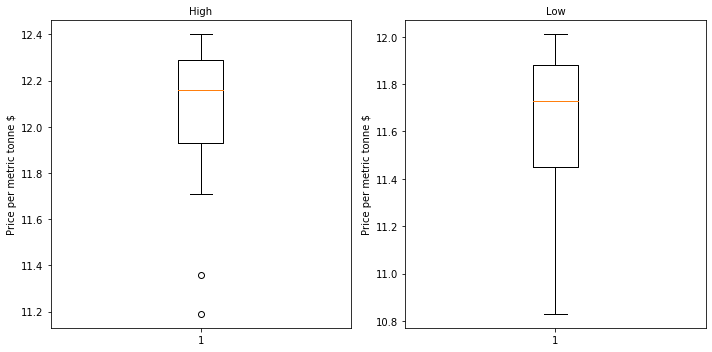

In [47]:
fig_HL_B , ax = plt.subplots(1,2, figsize=(10,5))

ax[0].boxplot(df['High'])
ax[0].set_title('High', fontsize=10)

ax[1].boxplot(df['Low'])
ax[1].set_title('Low', fontsize=10)

for axs in ax.flat:
    axs.set(ylabel='Price per metric tonne $')


plt.tight_layout()

Text(0.5, 1.0, 'Figure 3')

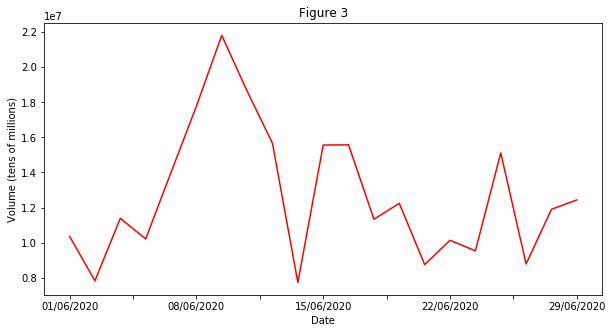

In [48]:
fig_V_L = plt.figure(figsize=(10,5))
df['Volume'].plot(color='red')
plt.ylabel('Volume (tens of millions)', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.title('Figure 3')

Text(0.5, 1.0, 'Figure 4')

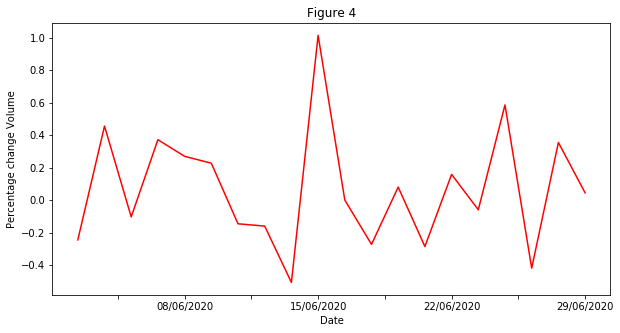

In [49]:
fig_V_L = plt.figure(figsize=(10,5))
df['Volume'].pct_change().plot(color='red')
plt.ylabel('Percentage change Volume', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.title('Figure 4')

Text(0.5, 1, 'Figure 5')

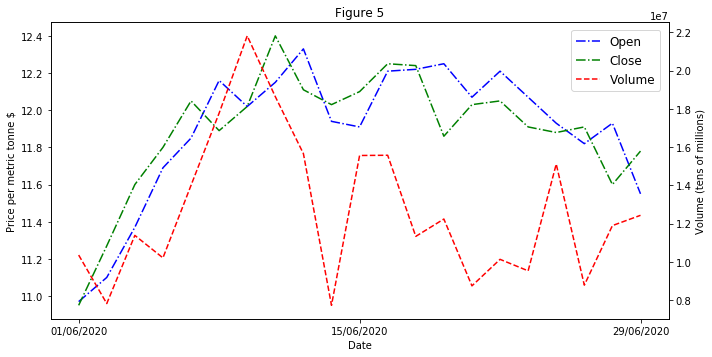

In [50]:
fig_OCV_L, ax1 = plt.subplots(figsize=(10,5))

ax1.set_xlabel('Date')
ax1.set_ylabel('Price per metric tonne $')
ax1.plot(df['Open'], label='Open', color='b', linestyle='-.')  
ax1.plot(df['Close'], label='Close', color='g', linestyle ='-.')


ax2 = ax1.twinx()
ax2.set_ylabel('Volume (tens of millions)')  
ax2.plot(df['Volume'], label='Volume', color='r', linestyle='--')


ax1.set_xticks([0,10,20])

fig_OCV_L.legend(bbox_to_anchor=(0.925, 0.925), fontsize=12)

fig_OCV_L.tight_layout()
plt.title('Figure 5')

## Discussion/Conclusion

The max/min daily price difference were 0.64 and 0.28. While the max/min difference between open and closing values was 0.39 and 0.0, all in absolute terms. As expected this suggests more volatility during times in which the market is open. 

The box plots also highlight greater variance in the lower end of prices, this may suggest a downward pricing pressure, or a firmer ceiling than floor. Figures 1 and 2, denoting Open/Close as well and High/Low, show an upward trend over the period as a whole with a hump in the middle. This could lead to a drop back down over the coming days and negate the trend. With econonomies opening back up and lockdowns easing, this seems unlikely.

Figure 3 and 4 display the exchange volume and percentage change. The graphs show a big downward spice on approximately 12 June, followed by a big increase by the 15th. This project does not seek to explain these occurnaces, mereley highlight them. However, an appoxiamte 40% fall followed by 100% rise, would be interesting to research futher.

Finally, Figure 5 plots Open/Close prices alonside Volume. Unsurprisingly, the trade volume seems to conicide with the contract prices, albeit with far greater volatility. The direction of causality, if it exists at all, is however unclear.

Many world factors have caused a chaning dynamic to sugar markets, beyond the obvious Covid-19 pandemic, such as low oil prices. Oversupply at one point caused markets to close at -$37.63 in April. Exploring a year to date comparision as a result of these, among other, factors would serve an interesting futher project.